Accuracy: 0.9856262833675564
Precision: 0.9861554883109505
Recall: 0.9856262833675564
F1 Score: 0.985533759968195
Confusion Matrix:
[[237   0   0]
 [  0 136   0]
 [  1   6 107]]
Classification Report:
              precision    recall  f1-score   support

   jungjasae       1.00      1.00      1.00       237
    gubujung       0.96      1.00      0.98       136
       gogae       1.00      0.94      0.97       114

    accuracy                           0.99       487
   macro avg       0.98      0.98      0.98       487
weighted avg       0.99      0.99      0.99       487



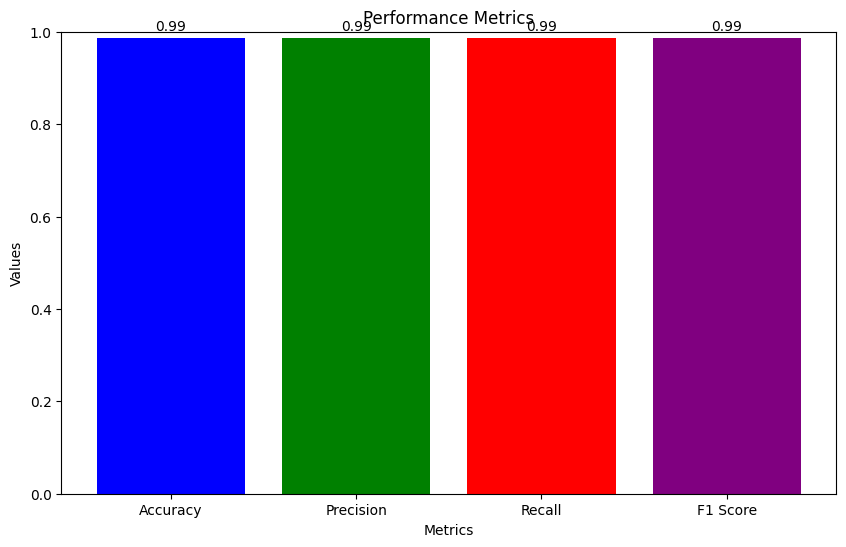

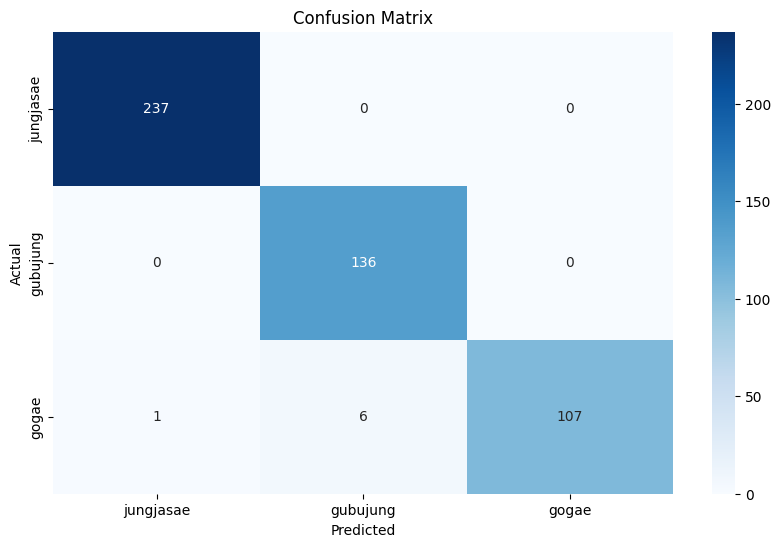

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

# CSV 파일 불러오기
df_jung = pd.read_csv("./jungjasae.csv")
df_gubu = pd.read_csv("./gubu.csv")
df_gogae = pd.read_csv("./gogae.csv")

# 결측치 지우기
df_gubu = df_gubu.dropna()
df_gogae = df_gogae.dropna()

# 결과값 추가하기 1 : 정자세 , 0 : 구부정한 자세, 2 : 고개숙임
df_jung['result'] = 0
df_gubu['result'] = 1
df_gogae['result'] = 2

# 데이터 합치기
total = pd.concat([df_jung, df_gubu, df_gogae], axis=0).reset_index(drop=True)

# 데이터 섞기
total = total.sample(frac=1)

# 컬럼 초기화
new_index = list(range(1, 1188))
total.index = new_index

# train, test set 분할
train = total.iloc[0:700]
test = total.iloc[700:]

sum_jungjasae = sum(total['result'] == 1)
sum_gubu = sum(total['result'] == 0)
sum_gogae = sum(total['result'] == 2)

# Creating a vertical bar graph
results = ['Jungjasae', 'Gubu', 'Gogae']
sums = [sum_jungjasae, sum_gubu, sum_gogae]

X_train = train[['nose_y', 'L_eye_y', 'L_ear_y', 'L_shoulder_y']]
y_train = train['result']
extra_data = total[['nose_y', 'L_eye_y', 'L_ear_y', 'L_shoulder_y', 'result']]

X_test = test[['nose_y', 'L_eye_y', 'L_ear_y', 'L_shoulder_y']]
y_test = test['result']

columns = ['nose_y', 'L_eye_y', 'L_ear_y', 'L_shoulder_y']
results = [1, 0, 2]
colors = ['b', 'g', 'r']

labels = ['jungjasae', 'gubujung', 'gogae']

# 모델 학습하기
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

pred = model_knn.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')
conf_matrix = confusion_matrix(y_test, pred)
class_report = classification_report(y_test, pred, target_names=labels)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 성능 지표를 막대 그래프로 시각화
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0, 1)
plt.title('Performance Metrics')
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')
plt.show()

# 혼동 행렬을 히트맵으로 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [9]:
#로지스틱 회귀

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# CSV 파일 불러오기
df_jung = pd.read_csv("./jungjasae.csv")
df_gubu = pd.read_csv("./gubu.csv")
df_gogae = pd.read_csv("./gogae.csv")

# 결측치 지우기
df_gubu = df_gubu.dropna()
df_gogae = df_gogae.dropna()

# 결과값 추가하기 0 : 정자세 , 1 : 구부정한 자세, 2 : 고개숙임
df_jung['result'] = 0
df_gubu['result'] = 1
df_gogae['result'] = 2

# 데이터 합치기
total = pd.concat([df_jung, df_gubu, df_gogae], axis=0).reset_index(drop=True)

# 데이터 섞기
total = total.sample(frac=1)

# 컬럼 초기화
new_index = list(range(1, 1188))
total.index = new_index

# train, test set 분할
train = total.iloc[0:700]
test = total.iloc[700:]

sum_jungjasae = sum(total['result'] == 1)
sum_gubu = sum(total['result'] == 0)
sum_gogae = sum(total['result'] == 2)

# Creating a vertical bar graph
results = ['Jungjasae', 'Gubu', 'Gogae']
sums = [sum_jungjasae, sum_gubu, sum_gogae]

X_train = train[['nose_y', 'L_eye_y', 'L_ear_y', 'L_shoulder_y']]
y_train = train['result']
extra_data = total[['nose_y', 'L_eye_y', 'L_ear_y', 'L_shoulder_y', 'result']]

X_test = test[['nose_y', 'L_eye_y', 'L_ear_y', 'L_shoulder_y']]
y_test = test['result']

columns = ['nose_y', 'L_eye_y', 'L_ear_y', 'L_shoulder_y']
results = [1, 0, 2]
colors = ['b', 'g', 'r']

labels = ['jungjasae', 'gubujung', 'gogae']

# 모델 학습하기
model_logistic = LogisticRegression(max_iter=10000)
model_logistic.fit(X_train, y_train)

pred = model_logistic.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')
conf_matrix = confusion_matrix(y_test, pred)
class_report = classification_report(y_test, pred, target_names=labels)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9568788501026694
Precision: 0.9626101421776311
Recall: 0.9568788501026694
F1 Score: 0.9570328654099927
Confusion Matrix:
[[238   5   0]
 [  0 137   0]
 [  0  16  91]]
Classification Report:
              precision    recall  f1-score   support

   jungjasae       1.00      0.98      0.99       243
    gubujung       0.87      1.00      0.93       137
       gogae       1.00      0.85      0.92       107

    accuracy                           0.96       487
   macro avg       0.96      0.94      0.95       487
weighted avg       0.96      0.96      0.96       487



In [10]:
# 디시전트리

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# CSV 파일 불러오기
df_jung = pd.read_csv("./jungjasae.csv")
df_gubu = pd.read_csv("./gubu.csv")
df_gogae = pd.read_csv("./gogae.csv")

# 결측치 지우기
df_gubu = df_gubu.dropna()
df_gogae = df_gogae.dropna()

# 결과값 추가하기 0 : 정자세 , 1 : 구부정한 자세, 2 : 고개숙임
df_jung['result'] = 0
df_gubu['result'] = 1
df_gogae['result'] = 2

# 데이터 합치기
total = pd.concat([df_jung, df_gubu, df_gogae], axis=0).reset_index(drop=True)

# 데이터 섞기
total = total.sample(frac=1)

# 컬럼 초기화
new_index = list(range(1, 1188))
total.index = new_index

# train, test set 분할
train = total.iloc[0:700]
test = total.iloc[700:]

sum_jungjasae = sum(total['result'] == 1)
sum_gubu = sum(total['result'] == 0)
sum_gogae = sum(total['result'] == 2)

# Creating a vertical bar graph
results = ['Jungjasae', 'Gubu', 'Gogae']
sums = [sum_jungjasae, sum_gubu, sum_gogae]

X_train = train[['nose_y', 'L_eye_y', 'L_ear_y', 'L_shoulder_y']]
y_train = train['result']
extra_data = total[['nose_y', 'L_eye_y', 'L_ear_y', 'L_shoulder_y', 'result']]

X_test = test[['nose_y', 'L_eye_y', 'L_ear_y', 'L_shoulder_y']]
y_test = test['result']

columns = ['nose_y', 'L_eye_y', 'L_ear_y', 'L_shoulder_y']
results = [1, 0, 2]
colors = ['b', 'g', 'r']

labels = ['jungjasae', 'gubujung', 'gogae']

# 모델 학습하기
model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(X_train, y_train)

pred = model_decision_tree.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')
conf_matrix = confusion_matrix(y_test, pred)
class_report = classification_report(y_test, pred, target_names=labels)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9794661190965093
Precision: 0.9798756113229783
Recall: 0.9794661190965093
F1 Score: 0.9795091257306743
Confusion Matrix:
[[235   0   0]
 [  0 143   7]
 [  1   2  99]]
Classification Report:
              precision    recall  f1-score   support

   jungjasae       1.00      1.00      1.00       235
    gubujung       0.99      0.95      0.97       150
       gogae       0.93      0.97      0.95       102

    accuracy                           0.98       487
   macro avg       0.97      0.97      0.97       487
weighted avg       0.98      0.98      0.98       487



Accuracy: 0.9876796714579056
Precision: 0.9880658333009186
Recall: 0.9876796714579056
F1 Score: 0.9876213693307707
Confusion Matrix:
[[235   0   0]
 [  0 131   0]
 [  1   5 115]]
Classification Report:
              precision    recall  f1-score   support

   jungjasae       1.00      1.00      1.00       235
    gubujung       0.96      1.00      0.98       131
       gogae       1.00      0.95      0.97       121

    accuracy                           0.99       487
   macro avg       0.99      0.98      0.98       487
weighted avg       0.99      0.99      0.99       487



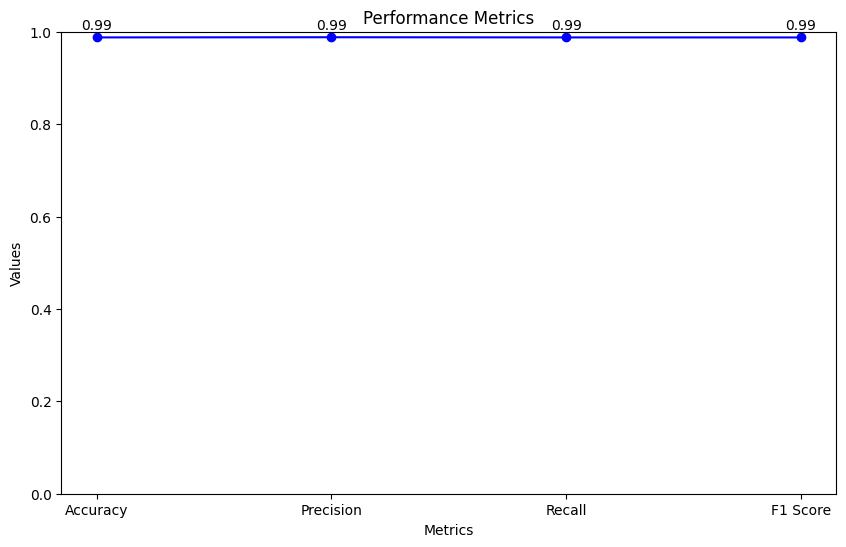

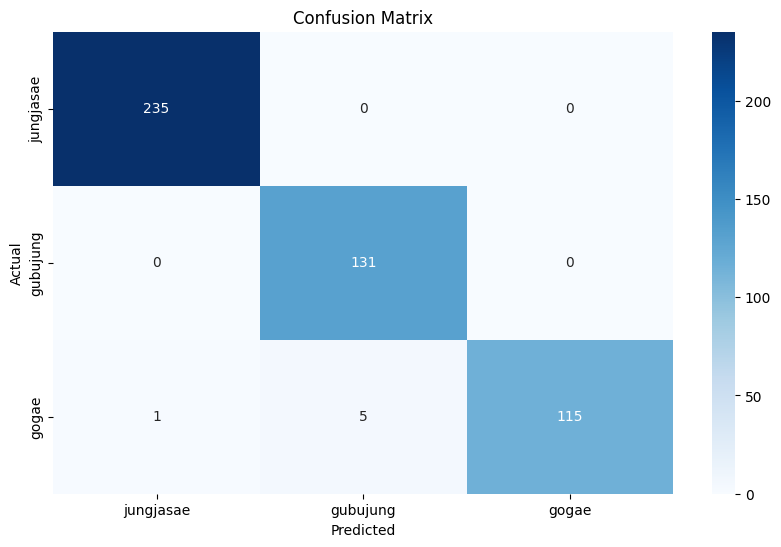

In [15]:
# 랜덤포레스트

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

# CSV 파일 불러오기
df_jung = pd.read_csv("./jungjasae.csv")
df_gubu = pd.read_csv("./gubu.csv")
df_gogae = pd.read_csv("./gogae.csv")

# 결측치 지우기
df_gubu = df_gubu.dropna()
df_gogae = df_gogae.dropna()

# 결과값 추가하기 0 : 정자세 , 1 : 구부정한 자세, 2 : 고개숙임
df_jung['result'] = 0
df_gubu['result'] = 1
df_gogae['result'] = 2

# 데이터 합치기
total = pd.concat([df_jung, df_gubu, df_gogae], axis=0).reset_index(drop=True)

# 데이터 섞기
total = total.sample(frac=1)

# 컬럼 초기화
new_index = list(range(1, 1188))
total.index = new_index

# train, test set 분할
train = total.iloc[0:700]
test = total.iloc[700:]

sum_jungjasae = sum(total['result'] == 1)
sum_gubu = sum(total['result'] == 0)
sum_gogae = sum(total['result'] == 2)

# Creating a vertical bar graph
results = ['Jungjasae', 'Gubu', 'Gogae']
sums = [sum_jungjasae, sum_gubu, sum_gogae]

X_train = train[['nose_y', 'L_eye_y', 'L_ear_y', 'L_shoulder_y']]
y_train = train['result']
extra_data = total[['nose_y', 'L_eye_y', 'L_ear_y', 'L_shoulder_y', 'result']]

X_test = test[['nose_y', 'L_eye_y', 'L_ear_y', 'L_shoulder_y']]
y_test = test['result']

columns = ['nose_y', 'L_eye_y', 'L_ear_y', 'L_shoulder_y']
results = [1, 0, 2]
colors = ['b', 'g', 'r']

labels = ['jungjasae', 'gubujung', 'gogae']

# 모델 학습하기
model_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
model_random_forest.fit(X_train, y_train)

pred = model_random_forest.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')
conf_matrix = confusion_matrix(y_test, pred)
class_report = classification_report(y_test, pred, target_names=labels)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 성능 지표를 선그래프로 시각화
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.plot(metrics, values, marker='o', linestyle='-', color='b')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.ylim(0, 1)
plt.title('Performance Metrics')
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')
plt.show()

# 혼동 행렬을 히트맵으로 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# CSV 파일 불러오기
df_jung = pd.read_csv("./jungjasae.csv")
df_gubu = pd.read_csv("./gubu.csv")
df_gogae = pd.read_csv("./gogae.csv")

# 결측치 지우기
df_gubu = df_gubu.dropna()
df_gogae = df_gogae.dropna()

# 결과값 추가하기      1 : 정자세 , 0 : 구부정한 자세, 2 : 고개숙임
df_jung['result'] = 0
df_gubu['result'] = 1
df_gogae['result'] = 2

# 데이터 합치기
total = pd.concat([df_jung, df_gubu, df_gogae], axis=0).reset_index(drop=True)

# 데이터 섞기
total = total.sample(frac=1)

# 컬럼 초기화
new_index = list(range(1, 1188))
total.index = new_index

# train, test set 분할
train = total.iloc[0:700]
test = total.iloc[700:]

sum_jungjasae = sum(total['result'] == 1)
sum_gubu = sum(total['result'] == 0)
sum_gogae = sum(total['result'] == 2)

# Creating a vertical bar graph
results = ['Jungjasae', 'Gubu', 'Gogae']
sums = [sum_jungjasae, sum_gubu, sum_gogae]

X_train = train[['nose_y', 'L_eye_y', 'L_ear_y', 'L_shoulder_y']]
y_train = train['result']
extra_data = total[['nose_y', 'L_eye_y', 'L_ear_y', 'L_shoulder_y', 'result']]

X_test = test[['nose_y', 'L_eye_y', 'L_ear_y', 'L_shoulder_y']]
y_test = test['result']

columns = ['nose_y', 'L_eye_y', 'L_ear_y', 'L_shoulder_y']
results = [1, 0, 2]
colors = ['b', 'g', 'r']

labels = ['jungjasae', 'gubujung', 'gogae']

# 모델 학습하기
model_svm = SVC(kernel='linear', C=1.0, random_state=42)
model_svm.fit(X_train, y_train)

pred = model_svm.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, pred)}")


Accuracy: 0.9425051334702259


In [2]:
import pickle

#모델 저장
knnPickle = open('model_knn.h5', 'wb')
# source, destination 
pickle.dump(model_knn, knnPickle)
# close the file
knnPickle.close()

In [3]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.2.16  Python-3.10.14 torch-2.3.0+cpu CPU (13th Gen Intel Core(TM) i7-13700)
Setup complete  (24 CPUs, 31.7 GB RAM, 117.9/953.0 GB disk)


In [1]:
import cv2
import torch
import pickle
import numpy as np
from ultralytics import YOLO
from sklearn.metrics import accuracy_score

# Load the YOLO model
yolo_model = YOLO('yolov8n-pose.pt')  # Make sure you have the correct path to the YOLOv8 model

# Load the KNN model from disk
with open('model_knn.h5', 'rb') as f:
    model_knn = pickle.load(f)

# 웹캠 캡처 객체 생성
cap = cv2.VideoCapture(0)

frame_count = 0  # 프레임 카운트 초기화

while True:
    # 웹캠에서 프레임 읽기
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture image")
        break

    # YOLO model로 포즈 추정
    results = yolo_model(frame, conf=0.7)
        
    # 결과 렌더링
    annotated_frame = results[0].plot()
    
    # 포즈 추정 좌표 가져오기
    if results[0].keypoints is not None:
        keypoints = results[0].keypoints.xy[0]  # 첫 번째 사람의 keypoints 가져오기
        print(f"Keypoints detected: {keypoints}")  # Debug print statement
    else:
        keypoints = None
        print("No keypoints detected")  # Debug print statement
    
    if keypoints is not None and keypoints.shape[0] == 17:  # YOLOv8-pose는 보통 17개의 keypoints를 출력
        # Ensure that the necessary keypoints are valid (non-zero)
        if keypoints[0, 1] != 0 and keypoints[2, 1] != 0 and keypoints[4, 1] != 0 and keypoints[5, 1] != 0:
            # 추출한 좌표에서 필요한 y좌표 추출
            nose_y = keypoints[0, 1]   # 코 y좌표
            L_eye_y = keypoints[2, 1]  # 왼쪽 눈 y좌표
            L_ear_y = keypoints[4, 1]  # 왼쪽 귀 y좌표
            R_shoulder_y = keypoints[5, 1]  # 오른쪽 어깨 y좌표

            #print(f"nose_y : {nose_y}, L_eye_y: {L_eye_y}, L_ear_y: {L_ear_y}, R_shoulder_y: {R_shoulder_y}")  # Debug print statement
                
            # KNN 모델로 자세 분류
            input_data = np.array([[nose_y, L_eye_y, L_ear_y, R_shoulder_y]])
            pred = model_knn.predict(input_data)
                
            # 결과 출력
            if pred[0] == 0 or pred[0] == 2 :
                result_text = "jungjasae"
            elif pred[0] == 1 :
                result_text = "gubujung"
                
            print(f"Predicted posture: {result_text}")  # Debug print statement
            cv2.putText(annotated_frame, result_text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        else:
            print("Required keypoints are not detected properly")  # Debug print statement
    else:
        print("Not enough keypoints detected or keypoints are None")  # Debug print statement

    # OpenCV로 렌더링된 프레임 표시
    cv2.imshow("Pose Estimation", annotated_frame)

    # 'q' 키를 누르면 종료
    if cv2.waitKey(1) == ord('q'):
        break

# 리소스 해제
cap.release()
cv2.destroyAllWindows()

# 테스트 세트 정확도 출력
# Note: X_test and y_test should be defined in your script where you trained your KNN model
# Ensure X_test and y_test are properly loaded or defined
# pred_test = model_knn.predict(X_test)
# print(f"Accuracy on test set: {accuracy_score(y_test, pred_test)}")



0: 480x640 2 persons, 102.3ms
Speed: 4.2ms preprocess, 102.3ms inference, 893.7ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[427.8891, 179.1824],
        [470.7648, 140.6356],
        [389.2942, 138.7788],
        [527.2677, 161.8311],
        [341.8617, 158.2213],
        [599.8818, 332.2603],
        [275.1582, 324.7814],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 138.77877807617188, L_ear_y: 158.22128295898438, R_shoulder_y: 332.2602844238281
Predicted posture: jungjasae

0: 480x640 1 person, 61.5ms
Speed: 2.0ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[430.0315, 179.8849],
        [473.0060, 141.0168],
        [390.

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



0: 480x640 1 person, 60.3ms
Speed: 1.0ms preprocess, 60.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[430.6970, 180.9047],
        [472.9167, 140.8274],
        [390.3639, 140.7204],
        [529.2284, 161.1249],
        [341.8057, 161.8490],
        [602.2141, 334.3530],
        [276.3669, 327.1131],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 140.72035217285156, L_ear_y: 161.8489990234375, R_shoulder_y: 334.35302734375
Predicted posture: jungjasae

0: 480x640 1 person, 51.8ms
Speed: 1.0ms preprocess, 51.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[430.3956, 180.1793],
        [472.9507, 141.3989],
        [390.8265, 14

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



0: 480x640 1 person, 60.1ms
Speed: 1.0ms preprocess, 60.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[429.8343, 181.4961],
        [472.4609, 142.3140],
        [390.0986, 141.1360],
        [528.5239, 163.7823],
        [341.7632, 162.0580],
        [600.7203, 336.3857],
        [276.3841, 326.7920],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 141.13597106933594, L_ear_y: 162.05796813964844, R_shoulder_y: 336.3857116699219
Predicted posture: jungjasae

0: 480x640 2 persons, 49.3ms
Speed: 1.0ms preprocess, 49.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[429.6872, 181.0833],
        [472.4794, 142.1584],
        [390.3772

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



0: 480x640 2 persons, 49.9ms
Speed: 0.0ms preprocess, 49.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[430.0533, 181.2415],
        [471.1974, 142.9714],
        [390.4614, 142.7682],
        [526.3949, 163.8352],
        [342.7819, 164.3941],
        [600.1203, 334.2392],
        [275.5778, 326.1286],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 142.76824951171875, L_ear_y: 164.39407348632812, R_shoulder_y: 334.23919677734375
Predicted posture: jungjasae

0: 480x640 2 persons, 60.2ms
Speed: 0.0ms preprocess, 60.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[428.6440, 181.6151],
        [470.8997, 143.3542],
        [389.33

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 60.2ms
Speed: 1.0ms preprocess, 60.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[428.5493, 182.2389],
        [471.0367, 143.4676],
        [388.9563, 142.3192],
        [527.2329, 164.5862],
        [340.9722, 163.0120],
        [599.9689, 333.2979],
        [277.5009, 324.1115],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 142.3192138671875, L_ear_y: 163.01202392578125, R_shoulder_y: 333.2978515625
Predicted posture: jungjasae

0: 480x640 2 persons, 60.1ms
Speed: 1.5ms preprocess, 60.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[428.9405, 181.0057],
        [471.6412, 142.8535],
        [389.7441, 14

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 59.4ms
Speed: 0.0ms preprocess, 59.4ms inference, 4.8ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[428.9615, 180.5963],
        [471.1791, 142.0093],
        [389.3230, 141.0612],
        [526.8163, 163.3462],
        [341.2212, 162.1857],
        [599.6666, 331.6051],
        [276.6781, 325.8034],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 141.06118774414062, L_ear_y: 162.1856689453125, R_shoulder_y: 331.6051025390625
Predicted posture: jungjasae

0: 480x640 2 persons, 48.6ms
Speed: 2.5ms preprocess, 48.6ms inference, 12.1ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[428.4498, 181.0674],
        [470.7963, 142.2922],
        [388.9746

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 50.7ms
Speed: 2.4ms preprocess, 50.7ms inference, 15.6ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[429.7869, 181.0056],
        [471.8549, 141.9380],
        [390.3322, 140.9093],
        [527.0673, 161.7048],
        [342.0062, 160.2694],
        [602.4703, 330.9623],
        [275.0816, 325.0535],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 140.90927124023438, L_ear_y: 160.2694091796875, R_shoulder_y: 330.9622802734375
Predicted posture: jungjasae

0: 480x640 2 persons, 40.0ms
Speed: 1.0ms preprocess, 40.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[428.7290, 180.1817],
        [470.8319, 142.1430],
        [390.0873

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



0: 480x640 2 persons, 39.0ms
Speed: 1.0ms preprocess, 39.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[429.8518, 181.2303],
        [472.7100, 141.5042],
        [389.5095, 141.0033],
        [529.5787, 162.4952],
        [340.8822, 162.2319],
        [601.0660, 331.9912],
        [277.2865, 326.0097],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 141.00332641601562, L_ear_y: 162.23190307617188, R_shoulder_y: 331.9912414550781
Predicted posture: jungjasae

0: 480x640 1 person, 44.5ms
Speed: 1.0ms preprocess, 44.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[429.8761, 179.6330],
        [472.7485, 140.3160],
        [390.1295

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



0: 480x640 1 person, 43.0ms
Speed: 1.0ms preprocess, 43.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[430.8171, 180.8008],
        [473.3824, 140.5033],
        [390.0965, 140.6724],
        [530.1323, 161.5936],
        [341.4937, 162.8727],
        [602.2438, 335.5436],
        [277.3994, 326.8452],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 140.67236328125, L_ear_y: 162.87265014648438, R_shoulder_y: 335.5436096191406
Predicted posture: jungjasae

0: 480x640 1 person, 44.0ms
Speed: 1.0ms preprocess, 44.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[431.7788, 179.6269],
        [474.7585, 140.8134],
        [391.5614, 14

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



0: 480x640 1 person, 42.2ms
Speed: 2.0ms preprocess, 42.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[436.3153, 179.6276],
        [478.9609, 141.0149],
        [395.3779, 140.9514],
        [534.6227, 164.2864],
        [345.4435, 164.7231],
        [602.3496, 330.0598],
        [279.4676, 325.6745],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 140.95140075683594, L_ear_y: 164.72311401367188, R_shoulder_y: 330.0598449707031
Predicted posture: jungjasae

0: 480x640 1 person, 43.4ms
Speed: 1.0ms preprocess, 43.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[445.3563, 179.9866],
        [489.8468, 141.8293],
        [404.2271,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



0: 480x640 1 person, 44.7ms
Speed: 1.0ms preprocess, 44.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[456.0817, 183.0037],
        [500.9840, 143.6824],
        [415.4055, 140.4033],
        [554.3116, 165.6001],
        [360.8234, 158.4616],
        [608.5524, 329.5754],
        [289.7470, 322.6305],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 140.4033203125, L_ear_y: 158.46157836914062, R_shoulder_y: 329.57537841796875
Predicted posture: jungjasae

0: 480x640 1 person, 44.7ms
Speed: 1.0ms preprocess, 44.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[461.9614, 179.8071],
        [505.9776, 141.7750],
        [422.0841, 13

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



0: 480x640 1 person, 41.2ms
Speed: 1.0ms preprocess, 41.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[468.6746, 178.4157],
        [511.4753, 141.9574],
        [429.1718, 138.2314],
        [560.8418, 165.6737],
        [373.9442, 157.4787],
        [614.6147, 328.8813],
        [297.5973, 319.6708],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 138.2313690185547, L_ear_y: 157.47866821289062, R_shoulder_y: 328.8812561035156
Predicted posture: jungjasae

0: 480x640 1 person, 46.5ms
Speed: 1.0ms preprocess, 46.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[471.0870, 179.1447],
        [514.4830, 142.7836],
        [431.4841, 

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



0: 480x640 1 person, 46.8ms
Speed: 0.5ms preprocess, 46.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[468.7316, 178.9763],
        [510.9485, 142.5243],
        [429.1345, 138.6634],
        [559.7192, 164.5959],
        [373.5846, 156.5454],
        [613.6498, 326.8617],
        [299.2396, 316.7560],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 138.6634063720703, L_ear_y: 156.54541015625, R_shoulder_y: 326.8616943359375
Predicted posture: jungjasae

0: 480x640 1 person, 44.9ms
Speed: 1.0ms preprocess, 44.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[462.9541, 177.0097],
        [505.7102, 140.5897],
        [423.1436, 137

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



0: 480x640 1 person, 46.3ms
Speed: 1.0ms preprocess, 46.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[459.6180, 176.7088],
        [503.4966, 138.6582],
        [418.5049, 135.7101],
        [555.6680, 163.2444],
        [363.3386, 157.3799],
        [611.0697, 331.3004],
        [291.9994, 321.4170],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 135.71005249023438, L_ear_y: 157.37991333007812, R_shoulder_y: 331.3004150390625
Predicted posture: jungjasae

0: 480x640 1 person, 46.7ms
Speed: 1.0ms preprocess, 46.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[449.6830, 178.0850],
        [493.7129, 140.0744],
        [408.8102,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



0: 480x640 1 person, 39.8ms
Speed: 2.0ms preprocess, 39.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[444.9928, 177.5825],
        [489.1944, 140.0744],
        [403.5076, 137.2675],
        [541.9509, 166.0589],
        [348.7221, 160.3456],
        [603.8094, 333.5755],
        [276.8737, 323.7553],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 137.2675018310547, L_ear_y: 160.34555053710938, R_shoulder_y: 333.5755310058594
Predicted posture: jungjasae

0: 480x640 1 person, 41.6ms
Speed: 1.0ms preprocess, 41.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[440.5910, 178.7159],
        [483.8020, 141.4047],
        [399.3873, 

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



0: 480x640 1 person, 38.8ms
Speed: 1.0ms preprocess, 38.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[440.4604, 178.7639],
        [483.1743, 141.5776],
        [398.7297, 139.1074],
        [535.3311, 166.4807],
        [344.8640, 162.4486],
        [603.1744, 336.6605],
        [272.5228, 324.6893],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 139.10743713378906, L_ear_y: 162.4486083984375, R_shoulder_y: 336.6604919433594
Predicted posture: jungjasae

0: 480x640 1 person, 47.0ms
Speed: 0.0ms preprocess, 47.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[440.6139, 179.9357],
        [483.6736, 142.2983],
        [398.8414, 

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



0: 480x640 1 person, 45.9ms
Speed: 1.1ms preprocess, 45.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[442.5630, 179.4436],
        [485.0881, 141.4972],
        [400.8102, 139.7370],
        [536.6715, 165.2737],
        [346.5919, 162.2545],
        [600.6583, 333.8099],
        [274.1459, 327.0518],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 139.73696899414062, L_ear_y: 162.25448608398438, R_shoulder_y: 333.8099060058594
Predicted posture: jungjasae

0: 480x640 1 person, 44.7ms
Speed: 1.0ms preprocess, 44.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[444.0242, 179.2433],
        [487.4695, 141.1036],
        [402.4052,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



0: 480x640 1 person, 46.7ms
Speed: 1.0ms preprocess, 46.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[444.1136, 180.2369],
        [488.1823, 142.2314],
        [403.1066, 138.8463],
        [540.2809, 166.8955],
        [348.4843, 159.8985],
        [602.6416, 332.3571],
        [275.4139, 323.9835],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 138.8463134765625, L_ear_y: 159.89849853515625, R_shoulder_y: 332.3570861816406
Predicted posture: jungjasae

0: 480x640 1 person, 40.5ms
Speed: 1.0ms preprocess, 40.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[444.0927, 178.8987],
        [487.4792, 141.7166],
        [402.4288, 

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



0: 480x640 2 persons, 43.6ms
Speed: 1.0ms preprocess, 43.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[442.9880, 181.0644],
        [486.1677, 143.6832],
        [402.7287, 140.9724],
        [538.6563, 167.5613],
        [349.9117, 162.0355],
        [601.6409, 335.0625],
        [275.5969, 325.5978],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 140.97244262695312, L_ear_y: 162.0354766845703, R_shoulder_y: 335.0625305175781
Predicted posture: jungjasae

0: 480x640 1 person, 45.1ms
Speed: 1.0ms preprocess, 45.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[442.4880, 180.9536],
        [485.1557, 142.8551],
        [401.1779,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



0: 480x640 1 person, 46.0ms
Speed: 1.0ms preprocess, 46.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[440.8490, 181.8105],
        [483.2135, 144.6649],
        [400.0129, 142.9328],
        [535.0519, 168.5343],
        [347.0401, 165.4782],
        [600.5131, 330.2582],
        [274.0087, 324.6667],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 142.93276977539062, L_ear_y: 165.47824096679688, R_shoulder_y: 330.2581787109375
Predicted posture: jungjasae

0: 480x640 1 person, 44.1ms
Speed: 1.0ms preprocess, 44.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[437.7316, 188.7004],
        [480.4562, 149.2702],
        [397.3929,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 45.1ms
Speed: 1.0ms preprocess, 45.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[440.6774, 208.1229],
        [482.1123, 164.0463],
        [397.1755, 164.0694],
        [535.6038, 170.5016],
        [343.1462, 172.1279],
        [599.1982, 332.7718],
        [274.4637, 325.5662],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 164.06942749023438, L_ear_y: 172.12786865234375, R_shoulder_y: 332.77178955078125
Predicted posture: gubujung

0: 480x640 1 person, 45.0ms
Speed: 1.0ms preprocess, 45.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[441.0297, 213.6412],
        [483.8356, 169.7613],
        [397.7899,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 1 person, 47.1ms
Speed: 2.0ms preprocess, 47.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[445.2640, 233.3834],
        [486.4709, 186.6445],
        [399.6639, 186.4077],
        [537.1284, 180.9324],
        [339.9797, 182.0057],
        [586.9692, 326.9320],
        [275.2380, 321.2542],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 186.40774536132812, L_ear_y: 182.00570678710938, R_shoulder_y: 326.9319763183594
Predicted posture: gubujung

0: 480x640 1 person, 45.0ms
Speed: 1.0ms preprocess, 45.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[447.3528, 244.7150],
        [490.5304, 198.3459],
        [402.0240, 1

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 1 person, 39.7ms
Speed: 1.0ms preprocess, 39.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[451.5334, 248.9503],
        [493.7490, 200.4623],
        [403.0739, 201.5863],
        [546.8816, 190.9949],
        [340.8694, 195.4594],
        [596.1801, 324.2631],
        [281.4452, 319.2547],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 201.5862579345703, L_ear_y: 195.4593505859375, R_shoulder_y: 324.2630615234375
Predicted posture: gubujung

0: 480x640 1 person, 43.9ms
Speed: 1.0ms preprocess, 43.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[451.1970, 250.4701],
        [493.8520, 201.5789],
        [403.4436, 201

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 1 person, 46.2ms
Speed: 1.0ms preprocess, 46.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[450.7424, 248.5868],
        [493.2207, 199.6863],
        [402.5535, 200.3172],
        [546.2301, 188.9894],
        [340.5237, 192.3948],
        [599.4030, 322.7558],
        [278.3156, 321.8235],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 200.31723022460938, L_ear_y: 192.394775390625, R_shoulder_y: 322.7558288574219
Predicted posture: gubujung

0: 480x640 1 person, 42.8ms
Speed: 1.0ms preprocess, 42.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[448.8210, 248.2776],
        [491.6678, 200.0670],
        [401.3750, 200

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 44.7ms
Speed: 1.0ms preprocess, 44.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[446.2233, 245.8865],
        [488.1532, 199.2580],
        [399.4135, 199.1432],
        [540.0181, 190.4857],
        [338.7334, 192.2765],
        [595.2263, 321.3871],
        [277.3947, 317.8135],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 199.14315795898438, L_ear_y: 192.2764892578125, R_shoulder_y: 321.3870849609375
Predicted posture: gubujung

0: 480x640 1 person, 44.0ms
Speed: 1.0ms preprocess, 44.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[440.3629, 239.4036],
        [482.9992, 194.0107],
        [395.8935, 1

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 43.2ms
Speed: 1.0ms preprocess, 43.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[438.3535, 234.9648],
        [479.7684, 188.9777],
        [392.9091, 189.1303],
        [531.5289, 186.4200],
        [335.3604, 188.5952],
        [584.1840, 328.9698],
        [273.1665, 323.3175],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 189.13027954101562, L_ear_y: 188.5951690673828, R_shoulder_y: 328.96978759765625
Predicted posture: gubujung

0: 480x640 2 persons, 44.3ms
Speed: 1.0ms preprocess, 44.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[438.1888, 233.2724],
        [480.2260, 188.0776],
        [393.3859,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 43.7ms
Speed: 2.0ms preprocess, 43.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[437.9443, 227.1116],
        [479.6654, 182.9418],
        [393.2628, 181.5343],
        [530.1155, 186.4218],
        [335.4518, 185.2468],
        [578.9764, 332.1969],
        [274.7236, 325.3455],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 181.5343475341797, L_ear_y: 185.246826171875, R_shoulder_y: 332.1969299316406
Predicted posture: gubujung

0: 480x640 2 persons, 46.3ms
Speed: 1.0ms preprocess, 46.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[437.0793, 213.3150],
        [479.5095, 169.8928],
        [392.8591, 16

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 44.4ms
Speed: 2.0ms preprocess, 44.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[438.3999, 207.6278],
        [480.0968, 164.4018],
        [393.0641, 164.2570],
        [532.2648, 175.3530],
        [336.3720, 177.3158],
        [593.2407, 332.6981],
        [273.8647, 325.3043],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 164.25701904296875, L_ear_y: 177.3157501220703, R_shoulder_y: 332.6981201171875
Predicted posture: gubujung

0: 480x640 1 person, 44.2ms
Speed: 1.0ms preprocess, 44.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[440.3338, 196.4940],
        [481.4009, 155.0388],
        [394.7780, 1

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 38.5ms
Speed: 1.0ms preprocess, 38.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[440.3578, 188.8013],
        [481.0896, 149.0751],
        [395.1964, 149.4559],
        [531.0069, 170.1507],
        [337.9423, 173.1951],
        [596.2973, 335.3895],
        [271.3365, 329.3811],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 149.45590209960938, L_ear_y: 173.19508361816406, R_shoulder_y: 335.38946533203125
Predicted posture: jungjasae

0: 480x640 1 person, 42.6ms
Speed: 1.0ms preprocess, 42.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[439.9428, 188.5850],
        [480.9617, 148.9274],
        [395.4654

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 43.8ms
Speed: 1.0ms preprocess, 43.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[441.6071, 177.9630],
        [481.8580, 138.6263],
        [395.6503, 139.7756],
        [531.6528, 162.2361],
        [337.5476, 167.3492],
        [601.2692, 336.3811],
        [271.4642, 329.2235],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 139.77561950683594, L_ear_y: 167.3492431640625, R_shoulder_y: 336.3811340332031
Predicted posture: jungjasae

0: 480x640 2 persons, 44.1ms
Speed: 1.0ms preprocess, 44.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[440.5366, 176.3668],
        [480.0218, 137.2362],
        [395.0819,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 43.3ms
Speed: 1.4ms preprocess, 43.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[439.9601, 174.9163],
        [479.6530, 135.9374],
        [394.6309, 138.0597],
        [530.5306, 160.2437],
        [338.9142, 167.4869],
        [604.6627, 336.7714],
        [271.4496, 329.9059],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 138.05967712402344, L_ear_y: 167.4869384765625, R_shoulder_y: 336.7713623046875
Predicted posture: jungjasae

0: 480x640 2 persons, 44.1ms
Speed: 1.0ms preprocess, 44.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[440.1609, 175.2539],
        [479.9730, 136.6575],
        [395.4584,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 39.3ms
Speed: 1.0ms preprocess, 39.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[441.9134, 175.6304],
        [481.1700, 135.9011],
        [395.5999, 138.0276],
        [530.8081, 158.5145],
        [338.0297, 166.1216],
        [603.3789, 336.7653],
        [272.7335, 328.7654],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 138.0276336669922, L_ear_y: 166.1216278076172, R_shoulder_y: 336.7652893066406
Predicted posture: jungjasae

0: 480x640 2 persons, 43.3ms
Speed: 0.0ms preprocess, 43.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[441.2333, 178.5903],
        [481.4465, 138.5034],
        [397.1387, 

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 42.9ms
Speed: 2.0ms preprocess, 42.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[442.5398, 170.2900],
        [483.3817, 134.4513],
        [397.8091, 134.9369],
        [535.1136, 165.5600],
        [341.5849, 168.8380],
        [609.5598, 348.5710],
        [265.1074, 333.6363],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 134.93687438964844, L_ear_y: 168.83798217773438, R_shoulder_y: 348.57098388671875
Predicted posture: jungjasae

0: 480x640 2 persons, 41.9ms
Speed: 1.0ms preprocess, 41.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[442.9353, 169.2483],
        [486.5557, 132.9866],
        [398.691

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 40.0ms
Speed: 1.0ms preprocess, 40.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[446.6934, 166.0956],
        [491.5214, 132.4063],
        [399.5276, 130.9999],
        [544.9709, 177.3094],
        [339.2610, 176.2481],
        [611.6960, 368.0471],
        [259.7479, 348.8054],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 130.9999237060547, L_ear_y: 176.24806213378906, R_shoulder_y: 368.0471496582031
Predicted posture: jungjasae

0: 480x640 2 persons, 42.8ms
Speed: 1.1ms preprocess, 42.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[447.1452, 168.7820],
        [492.2556, 133.0337],
        [399.7920,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 1 person, 43.8ms
Speed: 1.0ms preprocess, 43.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[449.7858, 181.0890],
        [498.9994, 144.9801],
        [399.8173, 141.2855],
        [552.5441, 195.0787],
        [329.6313, 188.4683],
        [599.5129, 400.3274],
        [237.4960, 369.2863],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 141.28549194335938, L_ear_y: 188.46826171875, R_shoulder_y: 400.3273620605469
Predicted posture: jungjasae

0: 480x640 2 persons, 43.5ms
Speed: 1.0ms preprocess, 43.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[443.2531, 193.1531],
        [492.0205, 157.6809],
        [390.1978, 15

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 39.2ms
Speed: 1.0ms preprocess, 39.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[441.3466, 203.3400],
        [492.3328, 162.7993],
        [386.6481, 158.6556],
        [546.5903, 211.1787],
        [310.6811, 204.4611],
        [592.4875, 420.9249],
        [219.7307, 382.6975],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 158.65560913085938, L_ear_y: 204.4610595703125, R_shoulder_y: 420.9248962402344
Predicted posture: jungjasae

0: 480x640 2 persons, 42.2ms
Speed: 1.0ms preprocess, 42.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[440.2407, 215.0403],
        [489.5237, 175.1899],
        [384.1194,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 44.5ms
Speed: 1.0ms preprocess, 44.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[437.3914, 227.6197],
        [487.4155, 183.2460],
        [382.1576, 178.1817],
        [539.5787, 222.7471],
        [304.0304, 214.3333],
        [578.6476, 425.8802],
        [215.1580, 389.3463],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 178.18173217773438, L_ear_y: 214.33328247070312, R_shoulder_y: 425.8802185058594
Predicted posture: jungjasae

0: 480x640 2 persons, 42.5ms
Speed: 1.0ms preprocess, 42.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[436.1085, 228.8468],
        [487.0999, 183.7791],
        [380.3295

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 44.5ms
Speed: 1.0ms preprocess, 44.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[432.9269, 231.9999],
        [484.2461, 186.1755],
        [378.1578, 180.9906],
        [539.0183, 224.1980],
        [302.2292, 215.4918],
        [579.2990, 426.8715],
        [217.2389, 391.3329],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 180.9906463623047, L_ear_y: 215.49176025390625, R_shoulder_y: 426.8714599609375
Predicted posture: jungjasae

0: 480x640 2 persons, 43.5ms
Speed: 2.0ms preprocess, 43.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[433.5130, 232.0661],
        [484.6096, 186.1331],
        [377.4212,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 43.1ms
Speed: 1.0ms preprocess, 43.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[436.5048, 236.9993],
        [484.0584, 185.2779],
        [377.2400, 185.0537],
        [540.2582, 214.1921],
        [299.7404, 219.1916],
        [585.3098, 412.8239],
        [231.0793, 396.1362],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 185.05368041992188, L_ear_y: 219.19158935546875, R_shoulder_y: 412.82391357421875
Predicted posture: jungjasae

0: 480x640 2 persons, 44.1ms
Speed: 1.2ms preprocess, 44.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[435.4943, 235.6870],
        [485.8351, 188.2546],
        [378.407

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 38.9ms
Speed: 1.0ms preprocess, 38.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[435.9859, 238.0106],
        [486.0662, 189.8618],
        [379.0813, 186.0797],
        [540.5724, 223.1211],
        [300.7624, 218.4028],
        [585.8334, 426.5852],
        [215.6868, 393.4136],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 186.07965087890625, L_ear_y: 218.4027862548828, R_shoulder_y: 426.5851745605469
Predicted posture: jungjasae

0: 480x640 2 persons, 42.7ms
Speed: 1.0ms preprocess, 42.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[436.1193, 236.7831],
        [486.8353, 190.9268],
        [379.7473,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 42.5ms
Speed: 2.0ms preprocess, 42.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[439.0397, 239.7368],
        [488.5669, 191.2877],
        [382.0906, 187.6643],
        [540.9592, 222.4167],
        [301.8528, 217.6119],
        [578.2294, 419.4005],
        [216.4002, 389.1226],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 187.664306640625, L_ear_y: 217.6118927001953, R_shoulder_y: 419.4005126953125
Predicted posture: jungjasae

0: 480x640 2 persons, 43.0ms
Speed: 0.8ms preprocess, 43.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[447.9622, 239.9595],
        [493.5846, 191.2188],
        [387.1233, 1

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 39.7ms
Speed: 1.0ms preprocess, 39.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[452.7220, 238.3896],
        [498.1368, 190.6541],
        [390.1028, 190.5156],
        [  0.0000,   0.0000],
        [299.8374, 230.9143],
        [584.0135, 422.3636],
        [213.0831, 393.3644],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 190.51564025878906, L_ear_y: 230.91427612304688, R_shoulder_y: 422.3636474609375
Predicted posture: jungjasae

0: 480x640 2 persons, 43.3ms
Speed: 2.0ms preprocess, 43.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[461.4563, 238.6599],
        [502.7439, 189.4681],
        [395.7624

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 39.3ms
Speed: 1.0ms preprocess, 39.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[464.2675, 236.2247],
        [504.9735, 189.0065],
        [397.5826, 191.1540],
        [  0.0000,   0.0000],
        [298.4256, 236.8080],
        [580.1746, 420.3021],
        [212.1890, 391.5555],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 191.15396118164062, L_ear_y: 236.80795288085938, R_shoulder_y: 420.30206298828125
Predicted posture: jungjasae

0: 480x640 2 persons, 42.7ms
Speed: 2.0ms preprocess, 42.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[463.0160, 238.1745],
        [504.4326, 189.6422],
        [397.183

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 41.5ms
Speed: 1.0ms preprocess, 41.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[443.0409, 242.8002],
        [490.6800, 194.2553],
        [384.4612, 191.8038],
        [540.7171, 225.3071],
        [300.2471, 223.6294],
        [581.6351, 421.0746],
        [211.9268, 392.1096],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 191.80377197265625, L_ear_y: 223.6294403076172, R_shoulder_y: 421.0745849609375
Predicted posture: jungjasae

0: 480x640 2 persons, 43.6ms
Speed: 1.0ms preprocess, 43.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[410.3103, 237.7265],
        [466.8956, 192.6669],
        [360.0750,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 44.0ms
Speed: 1.0ms preprocess, 44.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[396.2346, 249.6631],
        [453.2419, 200.7794],
        [347.1770, 192.6688],
        [522.8056, 232.3928],
        [284.4426, 215.8955],
        [582.9372, 421.5681],
        [210.4268, 385.4349],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 192.66879272460938, L_ear_y: 215.8955078125, R_shoulder_y: 421.5680847167969
Predicted posture: jungjasae

0: 480x640 2 persons, 43.3ms
Speed: 1.0ms preprocess, 43.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[396.1578, 253.9753],
        [451.3199, 204.9057],
        [346.9686, 19

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 43.9ms
Speed: 1.0ms preprocess, 43.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[398.4821, 277.8810],
        [452.7625, 218.1127],
        [344.0692, 216.9347],
        [522.5881, 230.2273],
        [278.2020, 229.8990],
        [573.1941, 409.1276],
        [212.5517, 397.1986],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 216.93467712402344, L_ear_y: 229.89898681640625, R_shoulder_y: 409.1275634765625
Predicted posture: gubujung

0: 480x640 2 persons, 43.7ms
Speed: 1.0ms preprocess, 43.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[398.8324, 282.1649],
        [452.5187, 222.6623],
        [342.8890,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 44.7ms
Speed: 1.0ms preprocess, 44.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[402.3259, 299.4652],
        [456.9099, 243.7810],
        [348.8283, 238.6028],
        [517.8918, 254.3391],
        [278.3365, 244.0019],
        [551.9243, 412.6185],
        [209.1574, 391.7605],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 238.6028289794922, L_ear_y: 244.0019073486328, R_shoulder_y: 412.61846923828125
Predicted posture: gubujung

0: 480x640 2 persons, 43.5ms
Speed: 1.0ms preprocess, 43.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[408.0736, 315.0158],
        [461.4042, 254.8217],
        [349.8583, 

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 44.4ms
Speed: 1.0ms preprocess, 44.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[409.3048, 323.8981],
        [464.3120, 264.1234],
        [351.3255, 261.1752],
        [525.5278, 265.3290],
        [275.0131, 260.3344],
        [546.1058, 407.5952],
        [211.3766, 385.2987],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 261.17523193359375, L_ear_y: 260.3344421386719, R_shoulder_y: 407.59521484375
Predicted posture: gubujung

0: 480x640 2 persons, 40.2ms
Speed: 1.0ms preprocess, 40.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[410.0970, 326.9775],
        [464.7300, 264.8738],
        [350.8727, 26

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 42.8ms
Speed: 1.0ms preprocess, 42.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[410.1087, 329.7915],
        [465.3433, 267.0982],
        [350.7263, 265.6923],
        [527.4666, 262.5778],
        [272.9984, 261.0867],
        [546.6031, 404.4510],
        [210.4130, 385.8791],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 265.69232177734375, L_ear_y: 261.08673095703125, R_shoulder_y: 404.4510192871094
Predicted posture: gubujung

0: 480x640 2 persons, 44.2ms
Speed: 1.0ms preprocess, 44.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[409.8917, 328.8243],
        [465.2023, 267.5037],
        [351.9698,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 44.6ms
Speed: 1.0ms preprocess, 44.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[413.2531, 326.5889],
        [468.2382, 264.3760],
        [352.8519, 263.2786],
        [531.5738, 262.6613],
        [274.9758, 262.5445],
        [558.1454, 406.2427],
        [212.5357, 386.7047],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 263.2785949707031, L_ear_y: 262.54449462890625, R_shoulder_y: 406.24267578125
Predicted posture: gubujung

0: 480x640 2 persons, 44.0ms
Speed: 1.0ms preprocess, 44.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[416.4467, 325.5098],
        [471.0819, 264.9205],
        [356.8653, 26

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 44.3ms
Speed: 1.0ms preprocess, 44.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[418.9337, 324.6199],
        [474.1493, 263.3350],
        [359.2899, 259.7773],
        [533.2073, 263.4929],
        [277.7105, 257.8240],
        [546.5310, 409.5515],
        [214.0550, 385.5286],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 259.7772521972656, L_ear_y: 257.823974609375, R_shoulder_y: 409.55145263671875
Predicted posture: gubujung

0: 480x640 2 persons, 39.4ms
Speed: 1.1ms preprocess, 39.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[419.2021, 325.2591],
        [474.0490, 263.7637],
        [359.0026, 2

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 41.3ms
Speed: 1.0ms preprocess, 41.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[419.3772, 322.9689],
        [474.0695, 261.9832],
        [359.3362, 259.4201],
        [534.4077, 263.0029],
        [278.7463, 259.6642],
        [557.8867, 410.5957],
        [212.9127, 389.5381],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 259.4200744628906, L_ear_y: 259.6641845703125, R_shoulder_y: 410.595703125
Predicted posture: gubujung

0: 480x640 2 persons, 41.4ms
Speed: 2.0ms preprocess, 41.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[419.7438, 323.7666],
        [473.7902, 262.0239],
        [358.8676, 259.2

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 44.4ms
Speed: 1.0ms preprocess, 44.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[419.5298, 321.8929],
        [472.8716, 260.8773],
        [359.6364, 258.3975],
        [531.3569, 256.6824],
        [277.8049, 253.6908],
        [558.8060, 401.3120],
        [213.4228, 382.3064],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 258.39752197265625, L_ear_y: 253.6907958984375, R_shoulder_y: 401.3119812011719
Predicted posture: gubujung

0: 480x640 2 persons, 42.8ms
Speed: 1.0ms preprocess, 42.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[418.5154, 320.0447],
        [472.2936, 260.2406],
        [359.3121, 

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 44.0ms
Speed: 1.0ms preprocess, 44.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[423.7837, 291.9951],
        [475.3186, 232.2601],
        [365.6825, 232.1763],
        [536.3481, 235.4622],
        [289.1347, 237.8792],
        [577.2293, 397.5575],
        [217.3207, 385.9702],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 232.17633056640625, L_ear_y: 237.87918090820312, R_shoulder_y: 397.5574951171875
Predicted posture: gubujung

0: 480x640 2 persons, 43.4ms
Speed: 1.0ms preprocess, 43.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[429.0957, 242.1438],
        [480.7695, 183.8880],
        [373.1880,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 1 person, 44.3ms
Speed: 2.0ms preprocess, 44.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[432.3014, 189.5064],
        [481.6073, 143.9699],
        [382.3013, 140.4789],
        [538.3741, 170.2962],
        [315.6847, 163.9895],
        [594.4404, 363.0094],
        [231.8672, 346.8346],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 140.47894287109375, L_ear_y: 163.989501953125, R_shoulder_y: 363.0093994140625
Predicted posture: jungjasae

0: 480x640 1 person, 42.0ms
Speed: 1.0ms preprocess, 42.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[433.3201, 182.0828],
        [482.0592, 138.0671],
        [384.3346, 13

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 1 person, 42.9ms
Speed: 1.0ms preprocess, 42.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[440.9982, 168.2495],
        [486.3492, 125.9205],
        [393.3172, 124.4064],
        [541.4030, 150.4170],
        [332.4890, 148.6632],
        [608.3381, 329.2081],
        [254.5508, 323.4449],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 124.40641784667969, L_ear_y: 148.6632080078125, R_shoulder_y: 329.2080993652344
Predicted posture: jungjasae

0: 480x640 1 person, 43.6ms
Speed: 1.0ms preprocess, 43.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[444.1885, 168.3706],
        [488.9208, 127.0891],
        [398.6001, 1

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 1 person, 43.2ms
Speed: 1.0ms preprocess, 43.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[448.7893, 178.3984],
        [492.9271, 138.6231],
        [406.3457, 136.2205],
        [546.7578, 161.1592],
        [349.8424, 155.7637],
        [597.4426, 331.8527],
        [276.3610, 314.6133],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 136.22052001953125, L_ear_y: 155.763671875, R_shoulder_y: 331.8526916503906
Predicted posture: jungjasae

0: 480x640 1 person, 37.5ms
Speed: 2.0ms preprocess, 37.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[455.3276, 196.8961],
        [495.3013, 156.8826],
        [416.0320, 156.6

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Speed: 1.0ms preprocess, 41.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[458.9560, 199.0072],
        [496.1257, 162.5684],
        [420.7033, 161.7267],
        [543.8807, 177.7143],
        [370.6538, 176.1303],
        [593.8351, 333.0168],
        [299.2567, 309.2606],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 161.72671508789062, L_ear_y: 176.13031005859375, R_shoulder_y: 333.0167541503906
Predicted posture: gubujung

0: 480x640 2 persons, 39.1ms
Speed: 0.0ms preprocess, 39.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[462.2878, 196.3743],
        [502.2732, 161.5874],
        [426.2476, 158.6213],
        [549.7035

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 40.0ms
Speed: 1.0ms preprocess, 40.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[463.8021, 186.2818],
        [502.2082, 153.1168],
        [428.0305, 150.2826],
        [545.3705, 174.7740],
        [376.8760, 168.3033],
        [591.5811, 322.7901],
        [307.2103, 315.4635],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 150.28260803222656, L_ear_y: 168.30331420898438, R_shoulder_y: 322.7901306152344
Predicted posture: jungjasae

0: 480x640 2 persons, 44.4ms
Speed: 1.0ms preprocess, 44.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[462.6689, 181.6042],
        [500.8258, 150.5883],
        [427.6441

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 1 person, 43.1ms
Speed: 1.0ms preprocess, 43.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[460.2067, 172.8914],
        [499.5395, 139.7013],
        [423.3779, 137.8394],
        [544.7242, 166.2792],
        [372.3387, 161.8376],
        [595.9460, 321.1599],
        [306.4002, 314.4173],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 137.83938598632812, L_ear_y: 161.83758544921875, R_shoulder_y: 321.1599426269531
Predicted posture: jungjasae

0: 480x640 2 persons, 43.4ms
Speed: 1.0ms preprocess, 43.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[460.6233, 171.5195],
        [499.1629, 138.9019],
        [423.7468,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 1 person, 44.1ms
Speed: 1.0ms preprocess, 44.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[456.8438, 167.6583],
        [498.6530, 134.8198],
        [420.0573, 131.4649],
        [545.6571, 164.9500],
        [368.4154, 156.5782],
        [593.9761, 320.4516],
        [302.6567, 312.9209],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 131.46490478515625, L_ear_y: 156.5782012939453, R_shoulder_y: 320.4515686035156
Predicted posture: jungjasae

0: 480x640 1 person, 45.6ms
Speed: 1.0ms preprocess, 45.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[454.0906, 168.5915],
        [495.6260, 133.3203],
        [416.3384, 1

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 1 person, 44.0ms
Speed: 1.0ms preprocess, 44.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[450.9737, 163.8717],
        [493.7147, 128.6763],
        [411.0413, 127.9024],
        [544.4822, 160.0450],
        [358.1647, 158.0722],
        [603.9025, 323.8989],
        [289.9062, 321.8508],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 127.90240478515625, L_ear_y: 158.07223510742188, R_shoulder_y: 323.89892578125
Predicted posture: jungjasae

0: 480x640 1 person, 43.8ms
Speed: 1.0ms preprocess, 43.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[449.2220, 162.8518],
        [491.9373, 128.2209],
        [410.8980, 12

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 1 person, 41.3ms
Speed: 1.0ms preprocess, 41.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[453.1951, 163.0023],
        [497.6671, 125.2275],
        [411.4201, 123.8149],
        [552.6926, 156.6565],
        [353.2269, 151.4325],
        [597.0018, 336.7476],
        [271.7720, 312.9374],
        [  0.0000,   0.0000],
        [118.1944, 439.1391],
        [  0.0000,   0.0000],
        [203.5288, 480.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 123.81489562988281, L_ear_y: 151.43246459960938, R_shoulder_y: 336.74755859375
Predicted posture: jungjasae

0: 480x640 1 person, 43.2ms
Speed: 1.0ms preprocess, 43.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[452.8407, 165.7990],
        [498.9808, 126.7474],
        [411.3051, 12

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 1 person, 44.1ms
Speed: 1.0ms preprocess, 44.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[450.0304, 183.7077],
        [497.2396, 146.9908],
        [408.5883, 138.7169],
        [547.7179, 176.4391],
        [348.3324, 158.1770],
        [600.1340, 345.4525],
        [261.0997, 322.6007],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 138.7169189453125, L_ear_y: 158.177001953125, R_shoulder_y: 345.45245361328125
Predicted posture: jungjasae

0: 480x640 1 person, 44.8ms
Speed: 1.0ms preprocess, 44.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[445.0935, 196.5501],
        [492.7010, 156.1752],
        [399.7875, 14

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 1 person, 42.2ms
Speed: 1.3ms preprocess, 42.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[434.8733, 210.8921],
        [484.7505, 172.1832],
        [388.4020, 164.9526],
        [540.1860, 210.3499],
        [323.8492, 195.9763],
        [583.3480, 401.4866],
        [239.5425, 364.5845],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 164.9525604248047, L_ear_y: 195.97628784179688, R_shoulder_y: 401.4866027832031
Predicted posture: jungjasae

0: 480x640 2 persons, 44.6ms
Speed: 2.0ms preprocess, 44.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[432.7891, 214.5800],
        [483.1817, 175.2269],
        [385.1494, 

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 43.8ms
Speed: 1.0ms preprocess, 43.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [563.4333,  46.5690],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
Required keypoints are not detected properly

0: 480x640 2 persons, 39.1ms
Speed: 1.0ms preprocess, 39.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[436.3690, 255.0208],
        [485.4112, 204.0659],
        [381.8161, 199.4210],
        [539.8725, 223.8590],
        [305.9058, 217.4538],
 

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 43.6ms
Speed: 1.0ms preprocess, 43.6ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[433.5861, 305.4805],
        [488.5920, 246.0081],
        [375.2012, 242.2804],
        [550.0435, 246.9203],
        [296.1069, 240.7851],
        [567.8195, 402.1126],
        [223.2283, 377.6081],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 242.28036499023438, L_ear_y: 240.78512573242188, R_shoulder_y: 402.11260986328125
Predicted posture: gubujung

0: 480x640 2 persons, 42.9ms
Speed: 1.0ms preprocess, 42.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[433.8057, 321.5955],
        [486.1745, 255.5770],
        [371.5259

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 43.6ms
Speed: 1.0ms preprocess, 43.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[436.2945, 326.9147],
        [487.3588, 261.4759],
        [373.2921, 262.9096],
        [  0.0000,   0.0000],
        [286.8353, 255.8284],
        [572.0130, 399.9516],
        [219.0388, 384.0697],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 262.9095764160156, L_ear_y: 255.8284149169922, R_shoulder_y: 399.9516296386719
Predicted posture: gubujung

0: 480x640 2 persons, 40.2ms
Speed: 1.0ms preprocess, 40.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[435.3883, 325.7115],
        [487.4752, 263.3804],
        [373.8795, 2

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 43.0ms
Speed: 1.1ms preprocess, 43.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[433.1475, 324.2198],
        [483.8427, 258.9269],
        [371.9154, 260.6404],
        [542.2413, 248.6789],
        [288.6252, 254.3948],
        [578.5887, 400.3564],
        [216.1557, 389.5357],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 260.640380859375, L_ear_y: 254.3948211669922, R_shoulder_y: 400.35638427734375
Predicted posture: gubujung

0: 480x640 2 persons, 44.0ms
Speed: 2.0ms preprocess, 44.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[429.0998, 313.8885],
        [479.0334, 249.5513],
        [366.8452, 2

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 41.9ms
Speed: 1.0ms preprocess, 41.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [557.9301,  56.9758],
        [450.0424,  45.1460],
        [515.0840,  52.3404],
        [472.5483,  39.2601],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
Required keypoints are not detected properly

0: 480x640 2 persons, 43.3ms
Speed: 2.0ms preprocess, 43.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
 

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 43.3ms
Speed: 1.0ms preprocess, 43.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [573.2955,  56.4888],
        [469.7052,  48.8870],
        [537.4301,  49.2347],
        [482.1547,  41.8359],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
Required keypoints are not detected properly

0: 480x640 2 persons, 43.3ms
Speed: 1.0ms preprocess, 43.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
 

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 41.3ms
Speed: 1.0ms preprocess, 41.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[430.1365, 283.2840],
        [479.7440, 223.5164],
        [369.6613, 226.5214],
        [540.2363, 227.9264],
        [293.5222, 237.7581],
        [585.5617, 397.5457],
        [218.2923, 384.1031],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 226.52142333984375, L_ear_y: 237.758056640625, R_shoulder_y: 397.5457458496094
Predicted posture: gubujung

0: 480x640 2 persons, 43.2ms
Speed: 1.0ms preprocess, 43.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[434.5374, 283.3012],
        [481.4431, 224.4860],
        [373.4902, 2

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 44.9ms
Speed: 1.0ms preprocess, 44.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[420.9114, 287.2508],
        [474.5590, 229.6842],
        [364.3187, 227.5008],
        [538.1042, 234.4051],
        [291.7655, 232.0990],
        [576.0633, 397.8153],
        [221.2480, 378.9238],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 227.50079345703125, L_ear_y: 232.0990447998047, R_shoulder_y: 397.8153076171875
Predicted posture: gubujung

0: 480x640 2 persons, 44.6ms
Speed: 1.0ms preprocess, 44.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[414.6981, 288.5184],
        [469.5182, 229.3553],
        [358.7564, 

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 45.0ms
Speed: 1.0ms preprocess, 45.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[395.2461, 288.3979],
        [451.0667, 230.4012],
        [344.0649, 225.8716],
        [521.5187, 236.9558],
        [281.1092, 228.4022],
        [569.8528, 399.1048],
        [223.9385, 381.9973],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 225.87161254882812, L_ear_y: 228.4021759033203, R_shoulder_y: 399.10479736328125
Predicted posture: gubujung

0: 480x640 2 persons, 42.9ms
Speed: 1.0ms preprocess, 42.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[395.0395, 289.2921],
        [451.4671, 230.1431],
        [342.7623,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 45.1ms
Speed: 1.0ms preprocess, 45.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[415.8191, 284.5630],
        [467.8992, 224.1182],
        [356.2349, 226.5895],
        [532.0618, 233.2594],
        [282.7186, 241.5194],
        [584.1249, 401.2664],
        [218.5121, 389.8409],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 226.5894775390625, L_ear_y: 241.5194091796875, R_shoulder_y: 401.26641845703125
Predicted posture: gubujung

0: 480x640 2 persons, 42.0ms
Speed: 1.5ms preprocess, 42.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[444.4254, 282.9167],
        [488.5840, 222.6742],
        [378.7850, 

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 43.3ms
Speed: 1.0ms preprocess, 43.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[452.8308, 279.7161],
        [492.2269, 223.9344],
        [388.1964, 230.0397],
        [  0.0000,   0.0000],
        [294.5861, 251.0507],
        [566.9419, 403.6878],
        [218.6513, 389.2811],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 230.03973388671875, L_ear_y: 251.05067443847656, R_shoulder_y: 403.6878356933594
Predicted posture: gubujung

0: 480x640 2 persons, 44.4ms
Speed: 1.0ms preprocess, 44.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[452.2808, 281.9507],
        [493.0514, 224.4841],
        [387.9662,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 43.3ms
Speed: 1.0ms preprocess, 43.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[435.4483, 287.3927],
        [481.1698, 226.3195],
        [373.8241, 230.9875],
        [536.1804, 229.5551],
        [291.9663, 243.5582],
        [580.2377, 398.2480],
        [218.9656, 390.4507],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 230.98745727539062, L_ear_y: 243.55819702148438, R_shoulder_y: 398.2479553222656
Predicted posture: gubujung

0: 480x640 2 persons, 43.4ms
Speed: 1.0ms preprocess, 43.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[419.1441, 287.5785],
        [473.0176, 231.2807],
        [361.9894,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 43.1ms
Speed: 1.0ms preprocess, 43.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[393.5165, 293.6328],
        [448.7037, 233.9554],
        [340.6733, 231.6451],
        [521.9481, 238.5052],
        [277.7428, 235.1929],
        [571.3897, 397.3310],
        [221.6370, 384.7628],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 231.64511108398438, L_ear_y: 235.1929168701172, R_shoulder_y: 397.33099365234375
Predicted posture: gubujung

0: 480x640 2 persons, 44.4ms
Speed: 2.0ms preprocess, 44.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[385.7502, 292.8988],
        [441.6124, 233.6508],
        [335.6428,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 44.8ms
Speed: 1.1ms preprocess, 44.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[383.9902, 291.4393],
        [439.4587, 232.3286],
        [332.4714, 230.6736],
        [515.3573, 240.7951],
        [272.7039, 238.6077],
        [567.4879, 401.8625],
        [222.4203, 390.9297],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 230.67361450195312, L_ear_y: 238.60768127441406, R_shoulder_y: 401.86248779296875
Predicted posture: gubujung

0: 480x640 2 persons, 44.0ms
Speed: 1.0ms preprocess, 44.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[384.0740, 291.2590],
        [438.7217, 231.6292],
        [331.7964

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 43.8ms
Speed: 1.0ms preprocess, 43.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[384.3019, 292.2767],
        [443.2330, 233.2032],
        [332.8794, 228.2097],
        [520.0569, 240.1141],
        [271.1586, 230.1721],
        [570.9816, 405.2902],
        [215.5452, 379.9522],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 228.20965576171875, L_ear_y: 230.17208862304688, R_shoulder_y: 405.29022216796875
Predicted posture: gubujung

0: 480x640 2 persons, 44.1ms
Speed: 1.5ms preprocess, 44.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[387.7889, 293.2874],
        [442.0229, 233.5263],
        [335.2787

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 45.6ms
Speed: 1.0ms preprocess, 45.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[393.2365, 294.2007],
        [448.8567, 233.9681],
        [340.0567, 231.2997],
        [520.0738, 233.8355],
        [275.8495, 229.4236],
        [571.1277, 399.7185],
        [212.7614, 382.6581],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 231.29965209960938, L_ear_y: 229.42355346679688, R_shoulder_y: 399.718505859375
Predicted posture: gubujung

0: 480x640 1 person, 40.4ms
Speed: 2.0ms preprocess, 40.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[392.6131, 294.4123],
        [447.0681, 234.3949],
        [340.1742, 2

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 44.5ms
Speed: 1.0ms preprocess, 44.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[398.6758, 295.3327],
        [452.8725, 234.3891],
        [343.9684, 232.2898],
        [521.1006, 235.0518],
        [276.8946, 232.3821],
        [566.9275, 397.6985],
        [219.7621, 385.1885],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 232.28976440429688, L_ear_y: 232.38214111328125, R_shoulder_y: 397.698486328125
Predicted posture: gubujung

0: 480x640 2 persons, 44.0ms
Speed: 1.0ms preprocess, 44.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[400.5059, 295.5458],
        [452.9573, 234.6184],
        [344.0195, 

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 44.5ms
Speed: 1.0ms preprocess, 44.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[401.4254, 302.3137],
        [455.0907, 240.3514],
        [346.4849, 239.7800],
        [523.3462, 236.2661],
        [279.2719, 236.5321],
        [563.7056, 391.4922],
        [222.4688, 383.0838],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 239.77996826171875, L_ear_y: 236.5320587158203, R_shoulder_y: 391.4921569824219
Predicted posture: gubujung

0: 480x640 2 persons, 43.5ms
Speed: 1.0ms preprocess, 43.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[406.1815, 303.5280],
        [459.9457, 242.2162],
        [350.6863, 

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 42.4ms
Speed: 1.0ms preprocess, 42.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[408.4521, 300.4224],
        [460.6838, 238.4064],
        [350.9348, 239.5476],
        [526.0010, 235.6386],
        [279.2881, 240.4244],
        [568.1010, 389.6591],
        [221.8157, 386.4296],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 239.54759216308594, L_ear_y: 240.42440795898438, R_shoulder_y: 389.6590576171875
Predicted posture: gubujung

0: 480x640 2 persons, 43.7ms
Speed: 2.0ms preprocess, 43.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[408.1008, 298.3767],
        [461.6598, 237.4106],
        [350.7738,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 45.4ms
Speed: 1.0ms preprocess, 45.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[409.6787, 283.4009],
        [460.3040, 222.5965],
        [352.3010, 224.9046],
        [525.3160, 223.9129],
        [283.1921, 232.1400],
        [567.1014, 387.5448],
        [228.3065, 380.4187],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 224.90460205078125, L_ear_y: 232.13995361328125, R_shoulder_y: 387.5447998046875
Predicted posture: gubujung

0: 480x640 2 persons, 42.8ms
Speed: 1.0ms preprocess, 42.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[407.3789, 264.3715],
        [460.9687, 210.0649],
        [355.2104,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 41.0ms
Speed: 1.0ms preprocess, 41.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[411.3088, 250.3526],
        [463.0251, 194.3892],
        [358.0812, 194.9446],
        [533.3850, 206.4698],
        [296.7314, 210.8667],
        [584.2173, 380.1104],
        [240.1956, 365.2430],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 194.94464111328125, L_ear_y: 210.86671447753906, R_shoulder_y: 380.11041259765625
Predicted posture: jungjasae

0: 480x640 1 person, 42.6ms
Speed: 1.0ms preprocess, 42.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[418.5893, 211.0497],
        [467.4861, 164.9175],
        [370.9487

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 1 person, 45.7ms
Speed: 1.0ms preprocess, 45.7ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[432.9009, 181.7434],
        [476.4813, 141.7636],
        [388.2059, 139.6702],
        [530.9355, 164.0402],
        [332.2337, 161.8393],
        [600.9540, 334.6126],
        [264.8736, 317.6099],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 139.6702117919922, L_ear_y: 161.83929443359375, R_shoulder_y: 334.61260986328125
Predicted posture: jungjasae

0: 480x640 1 person, 40.0ms
Speed: 1.0ms preprocess, 40.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[432.8405, 181.7262],
        [477.8676, 143.0462],
        [391.9783, 

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 1 person, 44.3ms
Speed: 1.0ms preprocess, 44.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[445.7211, 184.2059],
        [485.3126, 149.2941],
        [407.8458, 148.5853],
        [536.7842, 170.2982],
        [357.8896, 168.5779],
        [594.3979, 322.6066],
        [285.0093, 311.7519],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 148.5852508544922, L_ear_y: 168.57785034179688, R_shoulder_y: 322.60662841796875
Predicted posture: jungjasae

0: 480x640 1 person, 43.6ms
Speed: 1.0ms preprocess, 43.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[447.5374, 186.4931],
        [487.8613, 150.6560],
        [409.9530, 

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 40.5ms
Speed: 1.0ms preprocess, 40.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[455.5236, 200.3455],
        [492.1895, 165.8174],
        [418.7061, 164.9547],
        [538.0370, 182.2663],
        [370.5416, 181.3796],
        [599.7330, 333.0398],
        [299.8319, 316.4106],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 164.9547119140625, L_ear_y: 181.37960815429688, R_shoulder_y: 333.039794921875
Predicted posture: jungjasae

0: 480x640 2 persons, 45.4ms
Speed: 1.0ms preprocess, 45.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[456.6169, 206.4386],
        [494.4786, 171.6103],
        [421.3309, 

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 43.0ms
Speed: 1.0ms preprocess, 43.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[456.4639, 199.0474],
        [494.4096, 167.1156],
        [421.5338, 164.4037],
        [538.1995, 188.4973],
        [372.1804, 182.4090],
        [588.8285, 329.3480],
        [306.0273, 321.5266],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 164.40374755859375, L_ear_y: 182.4090118408203, R_shoulder_y: 329.3480224609375
Predicted posture: gubujung

0: 480x640 2 persons, 46.4ms
Speed: 1.0ms preprocess, 46.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[457.4782, 193.5937],
        [494.2892, 160.3165],
        [422.1114, 

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 43.9ms
Speed: 1.0ms preprocess, 43.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[458.3062, 188.3354],
        [494.3072, 154.6093],
        [421.6029, 154.7191],
        [538.4489, 173.7564],
        [372.6194, 174.5737],
        [591.9796, 323.0383],
        [307.5625, 316.0332],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 154.71914672851562, L_ear_y: 174.57373046875, R_shoulder_y: 323.038330078125
Predicted posture: gubujung

0: 480x640 2 persons, 42.8ms
Speed: 1.0ms preprocess, 42.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[458.2690, 187.4808],
        [495.1396, 153.4470],
        [421.7130, 153

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 2 persons, 43.4ms
Speed: 1.0ms preprocess, 43.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[457.4328, 185.3367],
        [495.9414, 152.0353],
        [421.3246, 149.6959],
        [540.0776, 174.2725],
        [370.4323, 168.7681],
        [591.3555, 324.1159],
        [298.8879, 318.2038],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 149.69589233398438, L_ear_y: 168.76806640625, R_shoulder_y: 324.1158752441406
Predicted posture: jungjasae

0: 480x640 1 person, 43.8ms
Speed: 2.0ms preprocess, 43.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[455.8946, 189.8366],
        [495.6913, 153.2138],
        [417.6277, 15

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 1 person, 44.7ms
Speed: 1.0ms preprocess, 44.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[456.9864, 183.5510],
        [499.2379, 146.5277],
        [416.4354, 143.5118],
        [546.8315, 170.9249],
        [358.7545, 163.8409],
        [597.1731, 335.4349],
        [275.3557, 324.2120],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 143.5118408203125, L_ear_y: 163.84085083007812, R_shoulder_y: 335.4349365234375
Predicted posture: jungjasae

0: 480x640 1 person, 41.6ms
Speed: 1.0ms preprocess, 41.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[456.7430, 181.9402],
        [499.3977, 145.4240],
        [416.5067, 1

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Keypoints detected: tensor([[457.1688, 183.9802],
        [501.3192, 146.5302],
        [414.7935, 143.3985],
        [549.1489, 175.2267],
        [352.6867, 166.8992],
        [593.9816, 348.9197],
        [266.8189, 326.7853],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 143.39849853515625, L_ear_y: 166.89918518066406, R_shoulder_y: 348.91973876953125
Predicted posture: jungjasae

0: 480x640 1 person, 43.5ms
Speed: 1.0ms preprocess, 43.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[448.7535, 204.5864],
        [493.4821, 161.8201],
        [405.0832, 157.7845],
        [546.2006, 175.5505],
        [342.6901, 167.4256],
        [596.4987, 349.4350],
        [259.8762, 327.

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 1 person, 45.7ms
Speed: 1.0ms preprocess, 45.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[446.6162, 222.2826],
        [493.3934, 177.1389],
        [400.6991, 170.2062],
        [545.3717, 187.5712],
        [333.4885, 173.6431],
        [586.3660, 359.8185],
        [253.1837, 335.8319],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 170.20616149902344, L_ear_y: 173.64306640625, R_shoulder_y: 359.8184509277344
Predicted posture: jungjasae

0: 480x640 1 person, 43.2ms
Speed: 2.0ms preprocess, 43.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[447.1746, 225.6539],
        [492.6336, 181.5385],
        [401.7060, 174

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0: 480x640 1 person, 44.8ms
Speed: 2.0ms preprocess, 44.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[450.3622, 233.9515],
        [495.1310, 186.3749],
        [399.0738, 182.4453],
        [542.7038, 196.7562],
        [322.5424, 190.4389],
        [582.4582, 373.5635],
        [236.2631, 352.3325],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000],
        [  0.0000,   0.0000]])
L_eye_y: 182.44528198242188, L_ear_y: 190.43893432617188, R_shoulder_y: 373.56353759765625
Predicted posture: jungjasae

0: 480x640 1 person, 44.2ms
Speed: 1.0ms preprocess, 44.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
Keypoints detected: tensor([[444.6626, 226.3256],
        [493.7753, 178.5833],
        [394.5354,

C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
